In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate as integrate

/tmp/ipykernel_3525/2109595375.py:41: RuntimeWarning: divide by zero encountered in double_scalars
  return 1/s


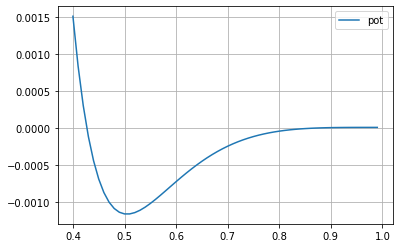

In [7]:
r = 1
def w2(s):
    if r - s > 0:
        return (r - s)**2 / s
    else:
        return 0

def w2_dot(s):
    if r - s > 0:
        return (-2*(r-s)*s + (r-s)) / s**2
    else:
        return 0

def grad(t, s):
    #print("t = {0}, s = {1}".format(t, s))
    return [w2(s) * w2_dot(s)]

x = np.arange(0, 2, 0.01)


oi = [0.00001]
t = [xi for xi in np.arange(0.4, 1.0, 0.01)]
t = list(reversed(t))
dt = 0.001
for xi in t[1:]:
    k1 = grad(0, xi)[0]
    k2 = grad(0, xi+k1/2*dt)[0]
    k3 = grad(0, xi+k2/2*dt)[0]
    k4 = grad(0, xi+k3*dt)[0]
    oi.append(
        oi[-1] + (k1 + 2*k2 + 2*k3 + k4)*dt/6
    )
#print(oi)
plt.plot(t, oi, label="pot")

# sol = integrate.solve_ivp(grad, [r, 0.5], y0=[0.001])
# print(sol.message)
# plt.plot(sol.t, sol.y[0], label="ori")

def obs2(s):
    return 1/s
y2 = [obs2(xi) for xi in x]
#plt.plot(x, y2, label="2")



#plt.ylim(-1, 0.1)
plt.grid()
plt.legend()


/tmp/ipykernel_3525/2109595375.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  return (r - s)**2 / s
/tmp/ipykernel_3525/2109595375.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  return (-2*(r-s)*s + (r-s)) / s**2


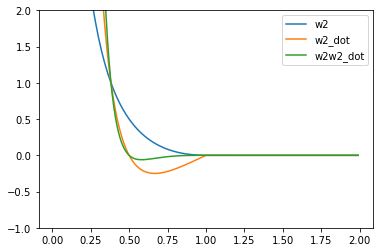

In [10]:
z = [w2(xi) for xi in x]
z_dot = [w2_dot(xi) for xi in x]
zz_dot = [w2(xi)*w2_dot(xi) for xi in x]
plt.plot(x, z, label="w2")
plt.plot(x, z_dot, label="w2_dot")
plt.plot(x, zz_dot, label="w2w2_dot")
plt.ylim(-1, 2)
plt.legend()

In [4]:
sol.t

NameError: name 'sol' is not defined

In [ ]:
for i in [0.1, 0.2, 0.3, 1, 2]: print(grad(0, i))

t = 0, s = 0.1
[583.1999999999998]
t = 0, s = 0.2
[38.4]
t = 0, s = 0.3
[5.08148148148148]
t = 0, s = 1
[0]
t = 0, s = 2
[0]
